In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47a9492de94be05a37094596abe3157d


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | campbellton
Processing Record 2 of Set 1 | burica
City not found. Skipping...
Processing Record 3 of Set 1 | xixiang
Processing Record 4 of Set 1 | acapulco
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | am timan
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | vestmannaeyjar
Processing Record 10 of Set 1 | chulym
Processing Record 11 of Set 1 | ketchikan
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | west bay
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | rocha
Processing Record 23 of Set 1 | belushya guba
City not found. Skipping...
Pr

Processing Record 36 of Set 4 | castanos
Processing Record 37 of Set 4 | ylivieska
Processing Record 38 of Set 4 | waipawa
Processing Record 39 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 40 of Set 4 | ponta do sol
Processing Record 41 of Set 4 | jalu
Processing Record 42 of Set 4 | altamira
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | riyadh
Processing Record 45 of Set 4 | teguldet
Processing Record 46 of Set 4 | bluff
Processing Record 47 of Set 4 | sola
Processing Record 48 of Set 4 | grand gaube
Processing Record 49 of Set 4 | balaipungut
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | buala
Processing Record 2 of Set 5 | roald
Processing Record 3 of Set 5 | anjozorobe
Processing Record 4 of Set 5 | akersberga
Processing Record 5 of Set 5 | moscow
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | bubaque
Processing Record 8 of Set 5 | mantua
Processing Record 9 of Set 5 | hambantota
Processin

Processing Record 22 of Set 8 | rock springs
Processing Record 23 of Set 8 | ankang
Processing Record 24 of Set 8 | shalakusha
Processing Record 25 of Set 8 | tateyama
Processing Record 26 of Set 8 | beyneu
Processing Record 27 of Set 8 | aklavik
Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | erenhot
Processing Record 30 of Set 8 | westport
Processing Record 31 of Set 8 | cam ranh
Processing Record 32 of Set 8 | constitucion
Processing Record 33 of Set 8 | tres arroyos
Processing Record 34 of Set 8 | camiri
Processing Record 35 of Set 8 | toliary
City not found. Skipping...
Processing Record 36 of Set 8 | yarmouth
Processing Record 37 of Set 8 | hun
Processing Record 38 of Set 8 | nouadhibou
Processing Record 39 of Set 8 | kodiak
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | maningrida
Processing Record 42 of Set 8 | asau
Processing Record 43 of Set 8 | yomitan
City not found. Skipping...
Processing Record 44 of Set 8 | p

Processing Record 13 of Set 12 | cap malheureux
Processing Record 14 of Set 12 | bokspits
City not found. Skipping...
Processing Record 15 of Set 12 | kochevo
Processing Record 16 of Set 12 | tirano
Processing Record 17 of Set 12 | itarema
Processing Record 18 of Set 12 | bauchi
Processing Record 19 of Set 12 | kaeo
Processing Record 20 of Set 12 | carmelo
Processing Record 21 of Set 12 | luanda
Processing Record 22 of Set 12 | whitehorse
Processing Record 23 of Set 12 | malanje
Processing Record 24 of Set 12 | morro bay
Processing Record 25 of Set 12 | horbranz
Processing Record 26 of Set 12 | arawa
Processing Record 27 of Set 12 | goderich
Processing Record 28 of Set 12 | popovo
Processing Record 29 of Set 12 | iguape
Processing Record 30 of Set 12 | santarem
Processing Record 31 of Set 12 | dukat
Processing Record 32 of Set 12 | bambanglipuro
Processing Record 33 of Set 12 | nancha
Processing Record 34 of Set 12 | rio grande
Processing Record 35 of Set 12 | hamilton
Processing Recor

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Campbellton,48.0075,-66.6727,51.80,62,39,18.41,CA,2021-05-16 22:39:02
1,Xixiang,35.1628,112.8650,58.59,75,58,6.04,CN,2021-05-16 22:41:09
2,Acapulco,16.8634,-99.8901,86.00,74,90,6.91,MX,2021-05-16 22:41:12
3,Busselton,-33.6500,115.3333,63.00,61,100,3.00,AU,2021-05-16 22:40:48
4,Am Timan,11.0297,20.2827,82.56,56,32,11.83,TD,2021-05-16 22:41:12
5,Punta Arenas,-53.1500,-70.9167,44.60,93,90,17.27,CL,2021-05-16 22:40:49
6,Kununurra,-15.7667,128.7333,62.60,48,1,8.05,AU,2021-05-16 22:41:12
7,Vestmannaeyjar,63.4427,-20.2734,40.32,68,100,2.08,IS,2021-05-16 22:41:13
8,Chulym,55.0997,80.9572,52.83,97,38,5.91,RU,2021-05-16 22:41:13
9,Ketchikan,55.3422,-131.6461,50.00,57,75,11.50,US,2021-05-16 22:41:13


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Campbellton,CA,2021-05-16 22:39:02,48.0075,-66.6727,51.80,62,39,18.41
1,Xixiang,CN,2021-05-16 22:41:09,35.1628,112.8650,58.59,75,58,6.04
2,Acapulco,MX,2021-05-16 22:41:12,16.8634,-99.8901,86.00,74,90,6.91
3,Busselton,AU,2021-05-16 22:40:48,-33.6500,115.3333,63.00,61,100,3.00
4,Am Timan,TD,2021-05-16 22:41:12,11.0297,20.2827,82.56,56,32,11.83
5,Punta Arenas,CL,2021-05-16 22:40:49,-53.1500,-70.9167,44.60,93,90,17.27
6,Kununurra,AU,2021-05-16 22:41:12,-15.7667,128.7333,62.60,48,1,8.05
7,Vestmannaeyjar,IS,2021-05-16 22:41:13,63.4427,-20.2734,40.32,68,100,2.08
8,Chulym,RU,2021-05-16 22:41:13,55.0997,80.9572,52.83,97,38,5.91
9,Ketchikan,US,2021-05-16 22:41:13,55.3422,-131.6461,50.00,57,75,11.50


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

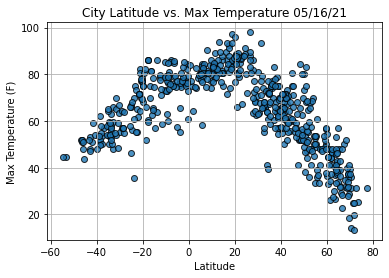

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

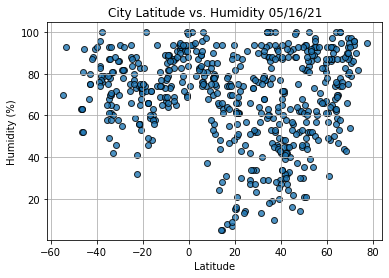

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

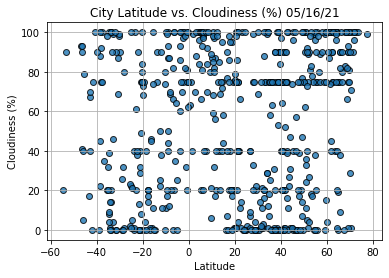

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

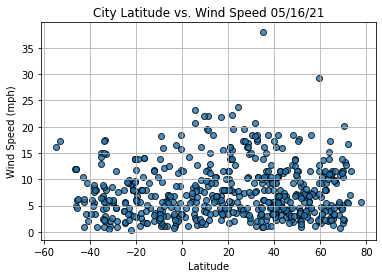

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
#examples-get a specific row from a current DataFrame is row = df.loc[row_index].
index13 = city_data_df.loc[13]
index13

City                        Pisco
Country                        PE
Date          2021-05-16 22:41:14
Lat                         -13.7
Lng                      -76.2167
Max Temp                       64
Humidity                       94
Cloudiness                     90
Wind Speed                   6.91
Name: 13, dtype: object

In [19]:
#examples-Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [20]:
#examples-return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Campbellton,CA,2021-05-16 22:39:02,48.0075,-66.6727,51.80,62,39,18.41
1,Xixiang,CN,2021-05-16 22:41:09,35.1628,112.8650,58.59,75,58,6.04
2,Acapulco,MX,2021-05-16 22:41:12,16.8634,-99.8901,86.00,74,90,6.91
4,Am Timan,TD,2021-05-16 22:41:12,11.0297,20.2827,82.56,56,32,11.83
7,Vestmannaeyjar,IS,2021-05-16 22:41:13,63.4427,-20.2734,40.32,68,100,2.08


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

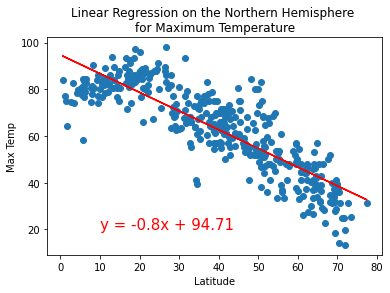

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = plt.title(f"Linear Regression on the Northern Hemisphere \n"
                        "for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp',(10,20))

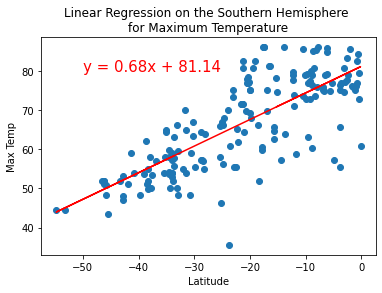

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = plt.title(f"Linear Regression on the Southern Hemisphere \n"
                        "for Maximum Temperature")


# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp',(-50,80))

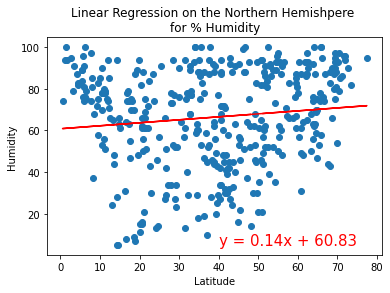

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = plt.title(f"Linear Regression on the Northern Hemishpere \n"
                     "for % Humidity")


# Call the function.
plot_linear_regression(x_values, y_values, title, 'Humidity', (40,5))

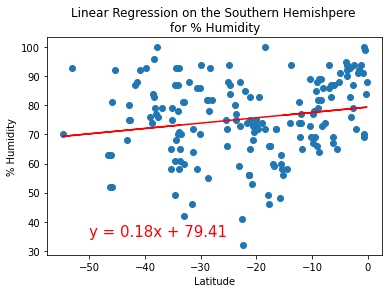

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = plt.title(f"Linear Regression on the Southern Hemishpere \n"
                     "for % Humidity")


# Call the function.
plot_linear_regression(x_values, y_values, title, '% Humidity',(-50,35))

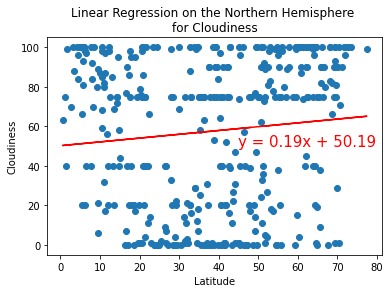

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = plt.title(f"Linear Regression on the Northern Hemisphere \n"
                        "for Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Cloudiness',(45,50))

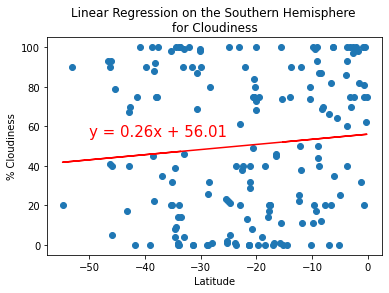

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = plt.title(f"Linear Regression on the Southern Hemisphere \n"
                        "for Cloudiness") 

# Call the function.
plot_linear_regression(x_values, y_values, title, '% Cloudiness',(-50,55))

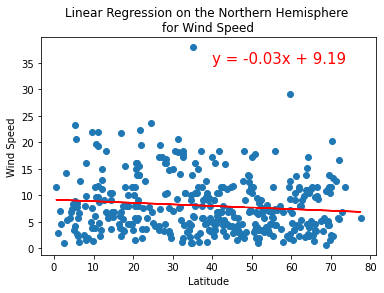

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
titel = plt.title(f"Linear Regression on the Northern Hemisphere \n"
                        "for Wind Speed") 


# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(40,35))

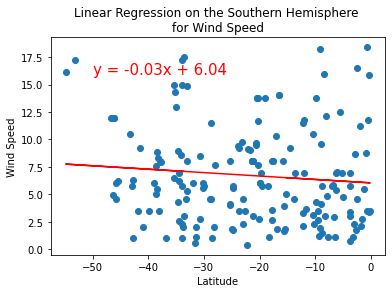

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = plt.title(f"Linear Regression on the Southern Hemisphere \n"
                        "for Wind Speed") 


# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(-50,16))